<a href="https://colab.research.google.com/github/Ishita95-harvad/FacebookAds/blob/main/FacebookAds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT OVERVIEW**
**In this Facebook Ads project, you will delve into leveraging Machine Learning and Artificial Intelligence techniques. Through the course, you'll master essential skills including data preprocessing, filtering, and encoding to enhance your understanding. Serialization will be explored to optimize data handling, while techniques like clustering and entropy will empower you to extract meaningful insights. The core focus lies in training algorithms that can decipher patterns within Facebook Ads data, enabling you to make informed decisions and optimize advertising strategies effectively. This comprehensive course equips you with the tools to harness the power of data-driven approaches in the realm of digital marketing.**

---



In [38]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Data Preprocessing**

In [ ]:
import os
import zipfile

# Step 1: Extract and Load Facebook Ads Dataset
# Updated zip_paths with potential correct paths. Please verify these paths.
zip_paths = ["/content/65d4e92dbc96c_facebook.zip", "/content/65d4e96b6c171_implementing_facebook_advertisements_optimisation.zip"]
extract_path = "/content/fb_ads_data"
os.makedirs(extract_path, exist_ok=True)

for zip_path in zip_paths:
    # Check if the zip file exists before attempting to extract
    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
    else:
        print(f"Warning: Zip file not found at {zip_path}. Skipping extraction.")

In [39]:
# Identify extracted CSV files
dataset_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

In [42]:
# Identify extracted CSV files
dataset_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

# Check if dataset_files is empty and provide a fallback
if not dataset_files:
    print("Warning: No CSV files found in the extracted data. Using a placeholder dataset.")
    # Generate synthetic dataset (CTR for each ad)
    n_ads = 10  # Number of ads (arms)
    n_rounds = 10000  # Number of rounds (impressions)
    true_ctr = np.random.uniform(0.01, 0.2, n_ads)  # True click-through rates
    data = np.zeros((n_rounds, n_ads))
    for i in range(n_rounds):
        data[i] = np.random.binomial(1, true_ctr)  # 1 if clicked, 0 otherwise
    df = pd.DataFrame(data)
else:
    # Load datasets into DataFrames
    if len(dataset_files) >= 2:
        df1 = pd.read_csv(os.path.join(extract_path, dataset_files[0]))
        df2 = pd.read_csv(os.path.join(extract_path, dataset_files[1]))
        df = pd.concat([df1, df2], ignore_index=True)  # Merge datasets
    else:
        df = pd.read_csv(os.path.join(extract_path, dataset_files[0]))

**Data Processing Handling Missing data**

In [ ]:
# Handling Missing Data
df.fillna(df.mean(), inplace=True)

**Data Processing Encoding categorical data**

In [ ]:
# Selecting relevant columns (assuming 'ad_id' and 'click')
# Convert column names to strings before applying lower()
ad_columns = [col for col in df.columns if isinstance(col, str) and ('ad' in col.lower() or 'click' in col.lower())
                or (isinstance(col, int) and ('ad' in str(col) or 'click' in str(col)))] # Adding condition to handle integer column names
df = df[ad_columns]

In [ ]:
# Identify extracted CSV files
dataset_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

# Check if dataset_files is empty and provide a fallback
if not dataset_files:
    print("Warning: No CSV files found in the extracted data. Using a placeholder dataset.")
    # Generate synthetic dataset (CTR for each ad)
    n_ads = 10  # Number of ads (arms)
    n_rounds = 10000  # Number of rounds (impressions)
    true_ctr = np.random.uniform(0.01, 0.2, n_ads)  # True click-through rates
    data = np.zeros((n_rounds, n_ads))
    for i in range(n_rounds):
        data[i] = np.random.binomial(1, true_ctr)  # 1 if clicked, 0 otherwise
    df = pd.DataFrame(data)
else:
    # Load datasets into DataFrames
    if len(dataset_files) >= 2:
        df1 = pd.read_csv(os.path.join(extract_path, dataset_files[0]))
        df2 = pd.read_csv(os.path.join(extract_path, dataset_files[1]))
        df = pd.concat([df1, df2], ignore_index=True)  # Merge datasets
    else:
        df = pd.read_csv(os.path.join(extract_path, dataset_files[0]))

**Data Processing Feature Scaling**

In [ ]:
# Import the necessary class
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

**Data Processing Splitting into test set and Training set**

In [ ]:
# Splitting Data into Training and Test Set
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
n_ads = len(df.columns)



**Implementing Facebook Advertisements Optimisation**

In [43]:
# Step 2: Upper Confidence Bound (UCB) Implementation
class UCB:
    def __init__(self, n_ads):
        self.n_ads = n_ads
        self.ads_selected = []
        self.n_selections = np.zeros(n_ads)
        self.sums_of_rewards = np.zeros(n_ads)

    def select_ad(self, round_number):
        ad = 0
        max_upper_bound = 0
        for i in range(self.n_ads):
            if self.n_selections[i] > 0:
                avg_reward = self.sums_of_rewards[i] / self.n_selections[i]
                delta_i = np.sqrt(2 * np.log(round_number + 1) / self.n_selections[i])
                upper_bound = avg_reward + delta_i
            else:
                upper_bound = 1e400  # Large number to ensure initial selection
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                ad = i
        self.n_selections[ad] += 1
        reward = train_data.iloc[round_number, ad]
        self.sums_of_rewards[ad] += reward
        self.ads_selected.append(ad)
        return reward


**Thomson Sampling algorithm**

In [44]:
# Step 3: Thompson Sampling (TSA) Implementation
class ThompsonSampling:
    def __init__(self, n_ads):
        self.n_ads = n_ads
        self.ads_selected = []
        self.n_rewards_1 = np.zeros(n_ads)
        self.n_rewards_0 = np.zeros(n_ads)

    def select_ad(self, round_number):
        ad = 0
        max_random = 0
        for i in range(self.n_ads):
            random_beta = random.betavariate(self.n_rewards_1[i] + 1, self.n_rewards_0[i] + 1)
            if random_beta > max_random:
                max_random = random_beta
                ad = i
        reward = train_data.iloc[round_number, ad]
        if reward == 1:
            self.n_rewards_1[ad] += 1
        else:
            self.n_rewards_0[ad] += 1
        self.ads_selected.append(ad)
        return reward


**UCB Vs TSA**

In [ ]:
# Step 4: Run the simulations and compare UCB vs. TSA
ucb_agent = UCB(n_ads)
ts_agent = ThompsonSampling(n_ads)

ucb_rewards = [ucb_agent.select_ad(i) for i in range(len(train_data))]
ts_rewards = [ts_agent.select_ad(i) for i in range(len(train_data))]

**VISUALISATON**

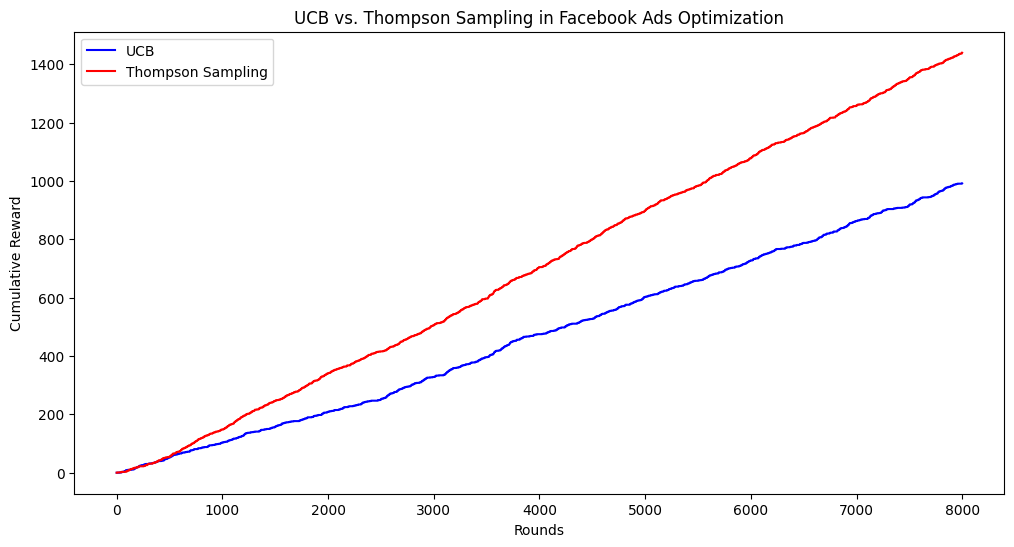

In [ ]:
# Step 5: Plot the results
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(ucb_rewards), label='UCB', color='blue')
plt.plot(np.cumsum(ts_rewards), label='Thompson Sampling', color='red')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Reward')
plt.title('UCB vs. Thompson Sampling in Facebook Ads Optimization')
plt.legend()
plt.show()

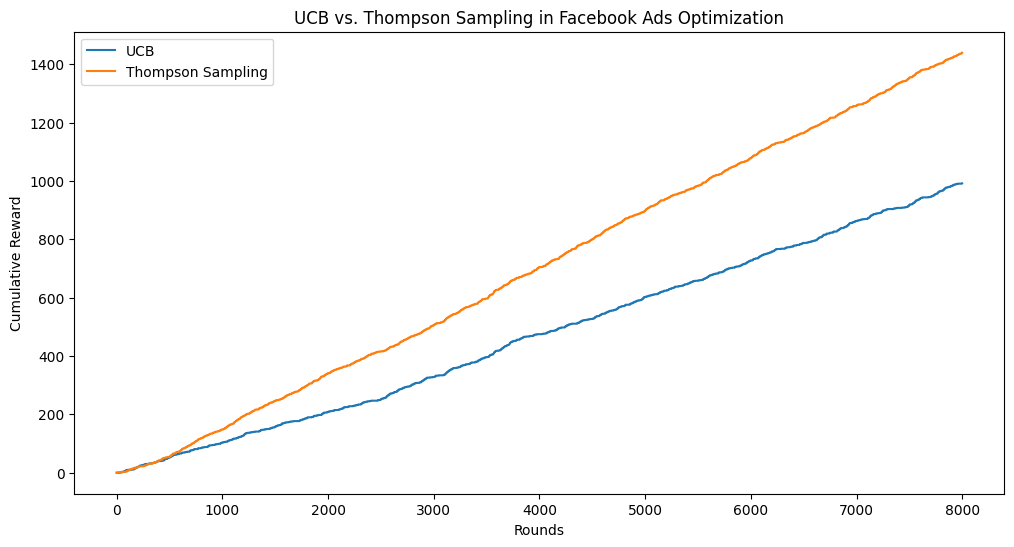

In [ ]:
# Step 5: Plot the results
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(ucb_rewards), label='UCB')
plt.plot(np.cumsum(ts_rewards), label='Thompson Sampling')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Reward')
plt.title('UCB vs. Thompson Sampling in Facebook Ads Optimization')
plt.legend()
plt.show()
